# GEO fire products evaluation using LEO images and a buffer
**Author:** Asaf Yupiter Vanunu  
**Date:** 02-06-2024

## Description
In this notebook I will present a simple and effective way to evalute GEO fire products using LEO images

# Import libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pre_post_process
import seaborn as sns
import pandas as pd

# The first section is the creation of a GEO fire product matrix and reprojected LEO matrix
- The main assumption is that the GEO fire product and the LEO fire detection are in the same projection and grid

In [11]:
## Set up a GEO matrix where 1 is a detected fire
GEO_matrix = np.zeros([10,10])
GEO_matrix[0,0] = 1
GEO_matrix[0,1] = 1
GEO_matrix[5,5] = 1
GEO_matrix[7,7] = 1
GEO_matrix[9,9] = 1
GEO_matrix[0,9] = 1

## Set up a LEO matrix where each cell value represent the number of LEO fire detections inside of it
LEO_matrix = np.zeros([10,10])
LEO_matrix[0,0] = 5
LEO_matrix[5,4] = 4
LEO_matrix[5,3] = 4
LEO_matrix[8,8] = 4
LEO_matrix[8,7] = 3
LEO_matrix[9,1] = 2

# Now we can plot both matrices
- Note that GEO fire label here is 1 and LEO values represent the number of LEO fire detections inside a GEO cell

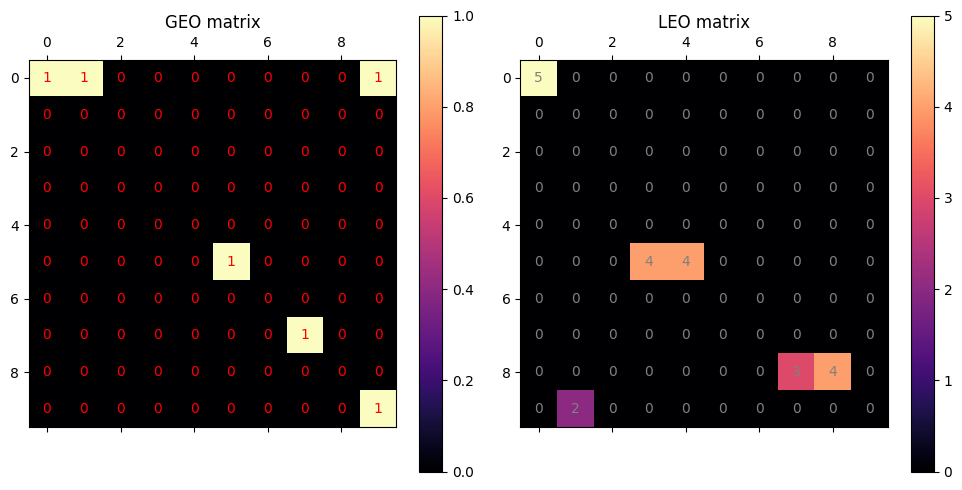

In [12]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first matrix
cax1 = ax1.matshow(GEO_matrix, cmap='magma')
fig.colorbar(cax1, ax=ax1)

# Add text annotations
for (i, j), val in np.ndenumerate(GEO_matrix):
    ax1.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='red')

# Set title for the first subplot
ax1.set_title('GEO matrix')

# Plot the second matrix
cax2 = ax2.matshow(LEO_matrix, cmap='magma')
fig.colorbar(cax2, ax=ax2)

# Add text annotations
for (i, j), val in np.ndenumerate(LEO_matrix):
    ax2.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='grey')

# Set title for the second subplot
ax2.set_title('LEO matrix')

# Show the plot
plt.tight_layout()
plt.show()


# Now we will apply a correction for misalignments in the LEO matrix
- This correction takes into account geolocation errors that can effect the evalution process
- We set a threshold for the number of the LEO fire detection as a mask. In this example it is 5

In [13]:
corrected_LEO_matrix = pre_post_process.correct_LEO_matrix(original_matrix=LEO_matrix, threshold=5)

- Now we can plot it

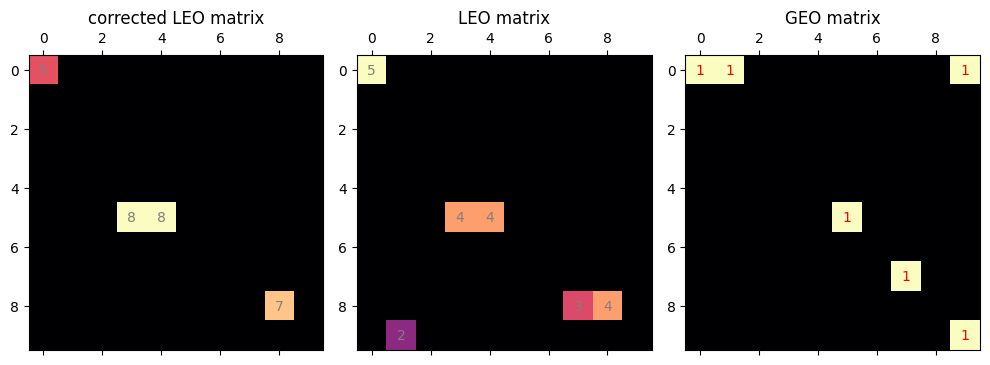

In [14]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Plot the first matrix
cax1 = ax1.matshow(corrected_LEO_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(corrected_LEO_matrix):
    if val>0:
        ax1.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='grey')

# Set title for the first subplot
ax1.set_title('corrected LEO matrix')

# Plot the second matrix
cax2 = ax2.matshow(LEO_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(LEO_matrix):
    if val>0:
        ax2.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='grey')

# Set title for the second subplot
ax2.set_title('LEO matrix')

# Plot the third matrix
cax3 = ax3.matshow(GEO_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(GEO_matrix):
    if val>0:
        ax3.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='red')

# Set title for the second subplot
ax3.set_title('GEO matrix')

# Show the plot
plt.tight_layout()
plt.show()

- as seen in the figures above correction remove single cells lower than the threshold
- when two or more adjacent cells have a value that is above 0 and below the threshold some correction is applied 

# Now we can calculate false alarms with or without a buffer
- This function takes the:
1. GEO and LEO matrices
2. A buffer setting. e.g. for a buffer of 3x3 we will use 1
3. The GEO fire label, could be an integer or a list
4. The number of LEO detections as threshold
5. And if we want to return the image
- The output is a dataframe with caluclation of ture positive, false positive and false negative

In [7]:
false_alarm_df, false_alarm_matrix = pre_post_process.calculate_false_alarm_GEO_LEO(corrected_rasterized_LEO_matrix=corrected_LEO_matrix,
                                        distance_buffer=1, GEO_matrix=GEO_matrix, fire_label_GEO=1, threshold=5, return_image="Y")

## Now we can see the output

In [8]:
false_alarm_df

,number_of_pixels_(n),True positive,False negative,False positive
0,100,5,0.0,1


- So in the above example when the threshold is set to 5 LEO detections and a buffer of 3x3

# We can plot all of the matrices
- Note that in the false alarm matrix a value of 99 represent true positive
- A value of 88 is false positive
- Values of 1 and 0.5 represent the acutal weights of computing false negatives

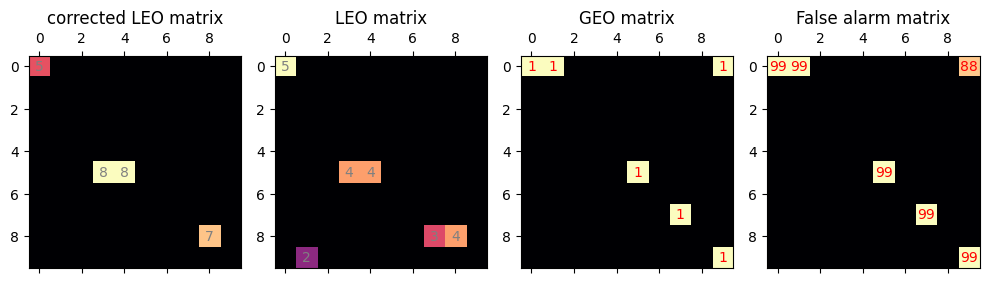

In [9]:
# Create a figure with four subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))

# Plot the first matrix
cax1 = ax1.matshow(corrected_LEO_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(corrected_LEO_matrix):
    if val>0:
        ax1.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='grey')

# Set title for the first subplot
ax1.set_title('corrected LEO matrix')

# Plot the second matrix
cax2 = ax2.matshow(LEO_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(LEO_matrix):
    if val>0:
        ax2.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='grey')

# Set title for the second subplot
ax2.set_title('LEO matrix')

# Plot the third matrix
cax3 = ax3.matshow(GEO_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(GEO_matrix):
    if val>0:
        ax3.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='red')

# Set title for the second subplot
ax3.set_title('GEO matrix')

# Plot the four matrix
cax4 = ax4.matshow(false_alarm_matrix, cmap='magma')

# Add text annotations
for (i, j), val in np.ndenumerate(false_alarm_matrix):
    if (val>0) & (val<1):
        ax4.text(j, i, f'{val}', ha='center', va='center', color='red')
    elif val>0:
        ax4.text(j, i, f'{np.int16(val)}', ha='center', va='center', color='red')

# Set title for the second subplot
ax4.set_title('False alarm matrix')

# Show the plot
plt.tight_layout()
plt.show()

# Now we can plot the buffer impact on the false alarm evaluation

In [10]:
## Set buffer size in a list and a label for the buffers
buffer_size_list = [0,1,2,3]
buffer_title_list = ["1x1 (no buffer)", "3x3", "5x5", "7x7"]

In [11]:
## Empty lists for True positive (TP), False positive (FP), False negative (FN)
TP = []
FP = []
FN = []
for size in buffer_size_list: ## for each buffer size compute evaluation
    false_alarm_df = pre_post_process.calculate_false_alarm_GEO_LEO(corrected_rasterized_LEO_matrix=corrected_LEO_matrix,
                    distance_buffer=size, GEO_matrix=GEO_matrix, fire_label_GEO=1, threshold=5, return_image="N")
    ## Append scores
    TP.append(false_alarm_df["True positive"][0])
    FP.append(false_alarm_df["False positive"][0])
    FN.append(false_alarm_df["False negative"][0])
 ## Create a df with results    
d = {"Buffer size": buffer_title_list, "True positive":TP, "False positive":FP, "False negative":FN}
df_plot = pd.DataFrame(d)
df_plot.set_index("Buffer size", inplace=True)
df_plot

,True positive,False positive,False negative
Buffer size,,,
1x1 (no buffer),1,5,2.0
3x3,5,1,0.0
5x5,5,1,0.0
7x7,5,1,0.0


# Now we can plot the buffer effect

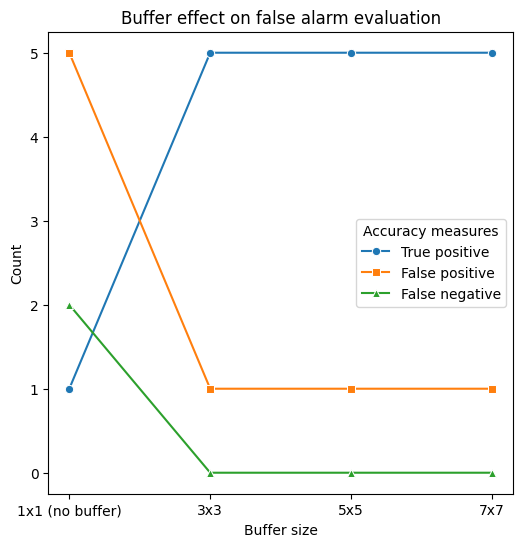

In [12]:
# Melt the DataFrame
df_melted = df_plot.reset_index().melt(id_vars=['Buffer size'], var_name='Accuracy measure', value_name='Count')

# Define markers for each variable
markers = {'True positive': 'o', 'False positive': 's', 'False negative': '^'}

# Create the plot
plt.figure(figsize=(6, 6))

# Loop through each column and plot it with the specified marker
for variable, marker in markers.items():
    sns.lineplot(data=df_melted[df_melted['Accuracy measure'] == variable],
                 x='Buffer size', y='Count', marker=marker, label= variable)

# Customize the plot
plt.title('Buffer effect on false alarm evaluation')
plt.xlabel('Buffer size')
plt.ylabel('Count')
plt.legend(title='Accuracy measures')

# Show the plot
plt.show()